In [33]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 244.8 kB/s eta 0:00:00


In [7]:
!pip install scikit-learn

  Using cached scikit_learn-1.2.0-cp38-cp38-win_amd64.whl (8.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [10]:
print(os.getcwd())
os.chdir('C:/Users/hp/Documents/traffic sign recogination')


C:\Users\hp\Documents\traffic sign recogination


In [11]:
count = 0
path = "Train"
data = [] 
label = []
classes =  43
cur_path = os.getcwd()

IMPORTING OF THE IMAGE AND PUTTING IN THE NUMPY ARRAY

In [12]:
myList = os.listdir(path)
noOfClasses = len(myList)
print("importing classes ...")
for x in range(0, noOfClasses):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = Image.open(path+"/"+str(count)+"/"+y)
#         curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
        curImg = curImg.resize((32,32))
        curImg = np.array(curImg)
        data.append(curImg)
        label.append(count)
    print(count, end=" ")
    count +=1
data = np.array(data)
label = np.array(label)


importing classes ...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [13]:

np.save('./training/data', data)
np.save('./training/target', label)

In [84]:
data = np.load('./training/data.npy', allow_pickle=True)
label = np.load('./training/target.npy', allow_pickle=True)

In [85]:
# no_of_Nodes =43
noOfClasses = 43
print(data.shape, label.shape)

(39209, 32, 32, 3) (39209,)


In [86]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size= 0.2, random_state= 42, shuffle=True)
x_train = x_train/255 
x_test =x_test/255
# normalization 

In [87]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [88]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [89]:
def myModel():
    input_shape= (32,32,3)
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    #Compilation of the model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model


#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(43, activation='softmax'))
#     opt = SGD(lr=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model
    

In [33]:
model=myModel()

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [35]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest")



In [36]:
epochs = 10
model=myModel()
history = model.fit(aug.flow(x_train, y_train, batch_size=32), epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
981/981 [==============================] - 378s 364ms/step - loss: 2.2523 - accuracy: 0.3369 - val_loss: 1.0042 - val_accuracy: 0.6544
Epoch 2/10
981/981 [==============================] - 307s 313ms/step - loss: 1.1307 - accuracy: 0.6238 - val_loss: 0.4167 - val_accuracy: 0.8660
Epoch 3/10
981/981 [==============================] - 321s 327ms/step - loss: 0.7463 - accuracy: 0.7529 - val_loss: 0.2292 - val_accuracy: 0.9337
Epoch 4/10
981/981 [==============================] - 342s 349ms/step - loss: 0.5701 - accuracy: 0.8104 - val_loss: 0.1807 - val_accuracy: 0.9448
Epoch 5/10
981/981 [==============================] - 301s 307ms/step - loss: 0.4695 - accuracy: 0.8432 - val_loss: 0.1314 - val_accuracy: 0.9549
Epoch 6/10
981/981 [==============================] - 302s 307ms/step - loss: 0.4052 - accuracy: 0.8649 - val_loss: 0.1181 - val_accuracy: 0.9569
Epoch 7/10
981/981 [==============================] - 285s 290ms/step - loss: 0.3612 - accuracy: 0.8805 - val_loss: 0.1121 -

In [13]:
ls

 Volume in drive C has no label.
 Volume Serial Number is AEEA-4E36

 Directory of C:\Users\hp\Documents\traffic sign recogination

02/06/2023  02:36 PM    <DIR>          .
02/06/2023  02:36 PM    <DIR>          ..
01/23/2023  03:58 AM    <DIR>          .ipynb_checkpoints
01/17/2023  09:42 AM    <DIR>          Meta
10/13/2019  04:49 AM             1,033 Meta.csv
01/30/2023  02:34 PM         2,410,740 model.h5
01/25/2023  02:59 AM           245,990 model_traned.pickle
01/25/2023  02:59 AM    <DIR>          model_traned.pickle.tf
01/25/2023  04:33 AM            17,038 realtimeOpencv.ipynb
01/17/2023  09:47 AM    <DIR>          Test
10/13/2019  04:49 AM           427,897 Test.csv
02/06/2023  02:36 PM           308,209 Traffic_Sign_Recogination_Deep_Learning.ipynb
01/17/2023  09:56 AM    <DIR>          Train
10/13/2019  04:50 AM         1,940,896 Train.csv
01/24/2023  09:33 AM    <DIR>          training
01/26/2023  11:52 AM         2,409,708 TSR.h5
               8 File(s)      7,761,511 b

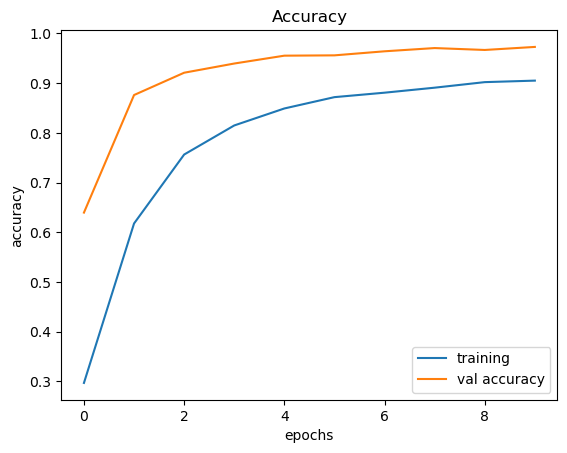

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label= 'training')
plt.plot(history.history['val_accuracy'],label=  'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

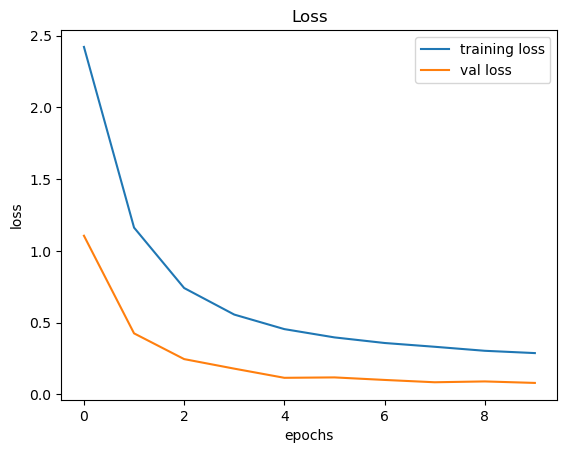

In [12]:
plt.figure(0)
plt.plot(history.history['loss'], label= 'training loss')
plt.plot(history.history['val_loss'],label=  'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
num_samples = []
for i in range(classes):
    file_count = len(os.listdir(path+"/"+str(i)))
    num_samples.append(file_count)
print(len(num_samples))  

43


In [14]:
print(num_samples)

[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]


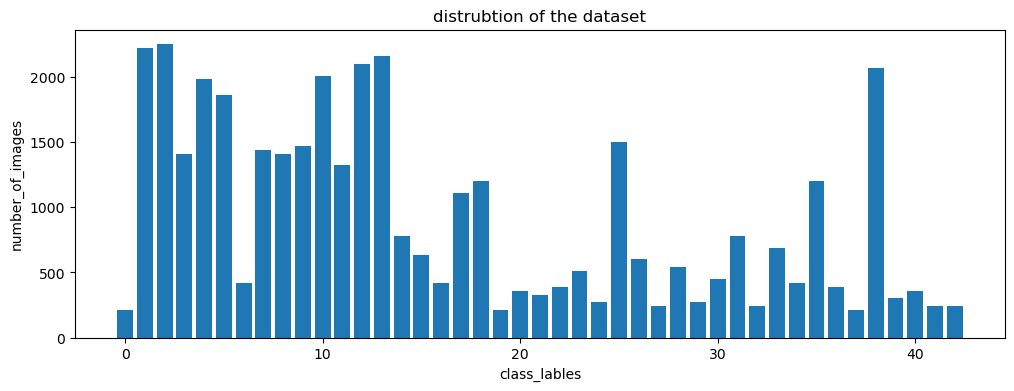

In [58]:
plt.figure(figsize = (12,4))
plt.bar(range(0, len(num_samples)),num_samples)
plt.title('distrubtion of the dataset')
plt.xlabel("class_lables")
plt.ylabel("number_of_images")
plt.show()

In [46]:
## save model
# save_path = './model.h5'
# model.save(save_path)

In [37]:
import pandas as pd
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label =  y_test['ClassId'].values
    imags = y_test['Path'].values
    data= []
    for img in imags: 
        image = Image.open(img)
        image = image.resize((32,32))
        image = np.array(image)
        data.append(image)
    x_test = np.array(data)
    return x_test,label

In [38]:
x_test, label = testing('Test.csv')

In [39]:
# pred = model.predict_classes(X_test)
# pred
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

395/395 [==============================] - 43s 77ms/step


array([16,  1, 38, ..., 38,  7, 10], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes_x))

0.8827395091053049


In [ ]:
model1=myModel()

cross validation

In [100]:
# Apply Model on Different Train-Test Regions of Data Using K Folding
def apply_model(CNN_model, dataX, dataY, n_folds = 10):
    accurcies, information = list(), list()
    # Save state or Seed to give same results
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_indc, test_indc in kfold.split(dataX):
        model = CNN_model()
        x_train, x_test, y_train, y_test = dataX[train_indc], dataY[train_indc], dataX[test_indc], dataY[test_indc]
        #parameters update num,not full batch, Data to Apply metrics on it   
        fold_info = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)
        _, acc = model.evaluate(x_test,x_test, verbose=1)
        print('> %.3f' % (acc * 100.0))
        accurcies.append(acc)
        information.append(fold_info)
    return accurcies, information
# from sklearn.model_selection import KFold, cross_val_score
# from keras.wrappers.scikit_learn import KerasClassifier

# estimator = KerasClassifier(build_fn=model1, epochs=10, batch_size=64)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator,x_train, y_train, cv=kfold)

In [101]:
from sklearn.model_selection import KFold
def validate_model_on_data(model, x_train, y_train,x_test, y_test):
    accuracies , information = apply_model(model,  x_train, y_train, 5)
    debugging_visualiztion(accuracies, information)

In [102]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367, 43) (7842, 43)


In [103]:
validate_model_on_data(model1, x_train, x_test, y_train, y_test)

ValueError: The first argument to `Layer.call` must always be passed.

In [57]:
import keras
import os
os.chdir(r'C:/Users/hp/Documents/traffic sign recogination')
from keras.models import load_model
model = load_model("./training/TSR.h5")

In [41]:
model.save("./training/TSR.h5")

In [16]:
classes = {
     0:'Speed Limit 20 km/h $ የፍጥነት ገደብ በሰዓት 20 ኪ.ሜ',
     1:'Speed Limit 30 km/h $ የፍጥነት ገደብ 30 ኪ.ሜ',
     2:'Speed Limit 50 km/h $ የፍጥነት ገደብ 50 ኪ.ሜ',
     3:'Speed Limit 60 km/h',
     4:'Speed Limit 70 km/h',
     5:'Speed Limit 80 km/h',
     6:'End of Speed Limit 80 km/h',
     7:'Speed Limit 100 km/h $ የፍጥነት ገደብ 100 ኪ.ሜ',
     8:'Speed Limit 120 km/h',
     9:'No passing',
     10:'No passing for vechiles over 3.5 metric tons',
     11:'Right-of-way at the next intersection',
     12:'Priority road',
     13:'Yield',
     14:'Stop',
     15:'No vechiles',
     16:'Vechiles over 3.5 metric tons prohibited',
     17:'No entry',
     18:'General caution',
     19:'Dangerous curve to the left',
     20:'Dangerous curve to the right',
     21:'Double curve',
     22:'Bumpy road',
     23:'Slippery road',
     24:'Road narrows on the right',
     25:'Road work',
     26:'Traffic signals',
     27:'Pedestrians',
     28:'Children crossing',
     29:'Bicycles crossing',
     30:'Beware of ice/snow',
     31:'Wild animals crossing',
     32:'End of all speed and passing limits',
     33:'Turn right ahead',
     34:'Turn left ahead',
     35:'Ahead only',
     36:'Go straight or right',
     37:'Go straight or left',
     38:'Keep right',
     39:'Keep left',
     40:'Roundabout mandatory',
     41:'End of no passing',
     42:'End of no passing by vechiles over 3.5 metric tons',
 
}

In [17]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((32,32))
    image = np.array(image)
    data.append(image)
    x_test = np.array(data)
    predict_x=model.predict(x_test) 
    classes_x=np.argmax(predict_x,axis=1)
    return image,classes_x
    

1/1 [==============================] - 0s 87ms/step
prediction of traffic sign is Speed Limit 100 km/h የፍጥነት ገደብ 100 ኪ.ሜ


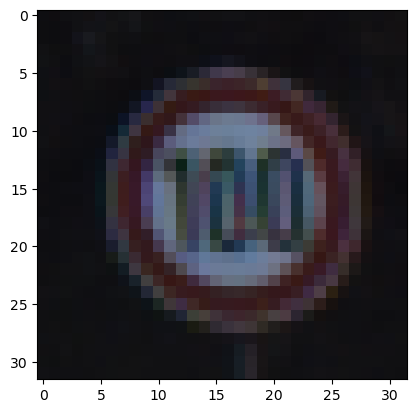

In [18]:
plot, prediction = test_on_img('C:/Users/hp/Documents/traffic sign recogination/Test/00011.png')
s= [str(i) for i in prediction]
a=  int("".join(s))
print("prediction of traffic sign is", classes[a])
plt.imshow(plot)
plt.show()

Confusion matrics

In [24]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(label, classes_x)

<AxesSubplot: >

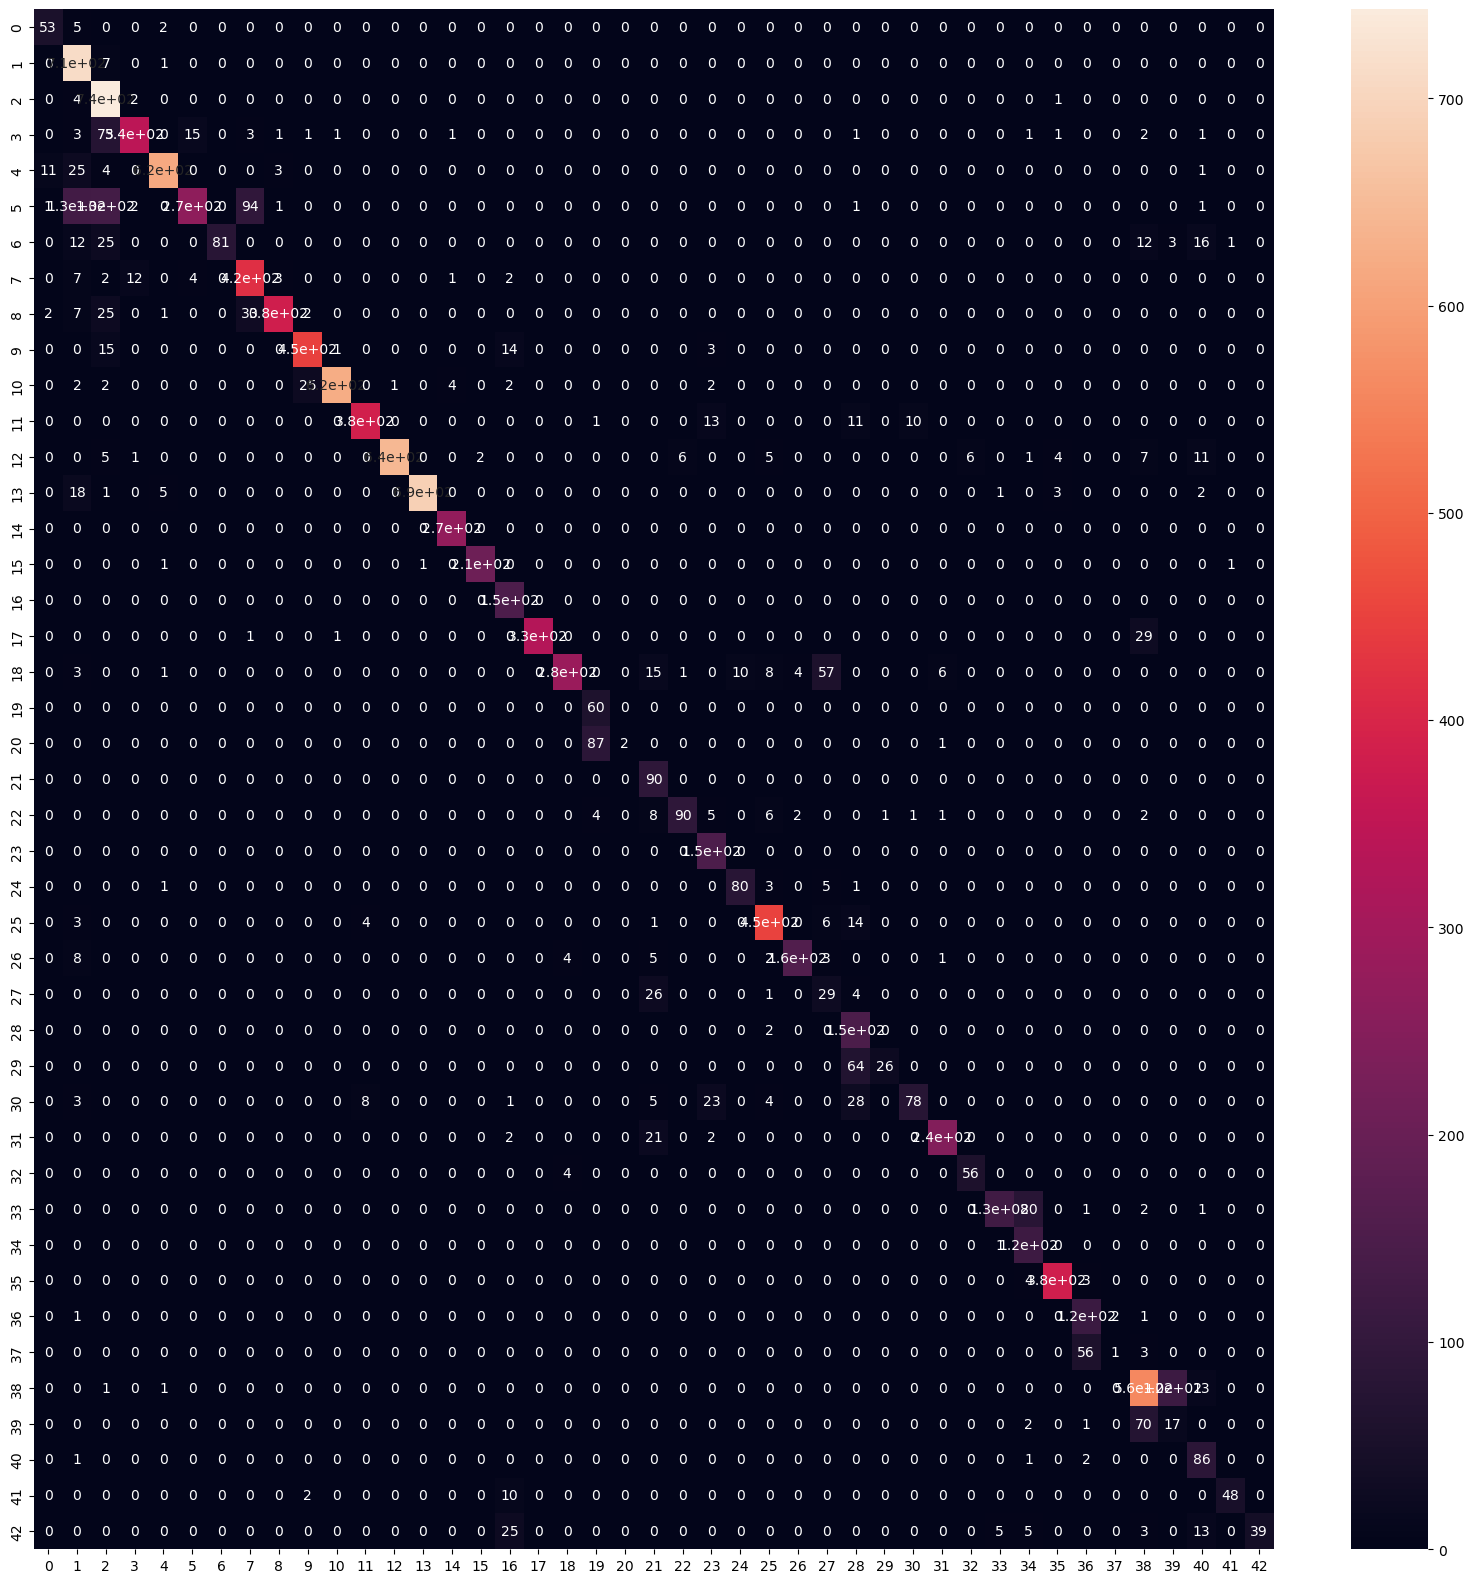

In [25]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

For Real Time Detection 

In [6]:
import tensorflow as tf
path = './TSR.h5'
model.save(path )
loaded_model= tf.keras.models.load_model(path )

In [11]:
import cv2
frameWidth = 640
frameHeight = 480
brightness = 100
threshold = 0.75
font = cv2.FONT_HERSHEY_SIMPLEX

In [12]:
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)


True

In [15]:
## load tensorflow model
import keras
model = keras.models.load_model(save_path)

In [10]:
import numpy as np

In [9]:
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
 

In [10]:
while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()

    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 3)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = (model.predict(img) > 0.5).astype("int32")
    predict_x=model.predict(img) 
    classIndex =np.argmax(predict_x,axis=1)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)

    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 239ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 75ms/step


KeyboardInterrupt: 